# Training and Evaluating Deep Learning (TabPFN) Model

In [1]:
# Install TabPFN Client
! pip install --upgrade tabpfn-client

In [2]:
# Importing Modules
import pandas as pd
from sklearn.model_selection import train_test_split
from tabpfn_client import init, TabPFNClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
# Download data
! wget -O metabolomics_data.csv https://raw.githubusercontent.com/rajanbit/ML-for-Tabular-Data-ICGEB-Workshop-2025/main/data/metabolomics_data.csv

--2025-11-12 11:13:51--  https://raw.githubusercontent.com/rajanbit/ML-for-Tabular-Data-ICGEB-Workshop-2025/main/data/metabolomics_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262977 (257K) [text/plain]
Saving to: ‘metabolomics_data.csv’

metabolomics_data.c 100%[===================>] 256.81K  --.-KB/s    in 0.03s   

2025-11-12 11:13:51 (9.63 MB/s) - ‘metabolomics_data.csv’ saved [262977/262977]



In [4]:
# Metabolomics Raw Data
data = pd.read_csv("metabolomics_data.csv", index_col="SampleID")

# data.head()

In [5]:
# Feature matrix
X = data.drop(["class"], axis=1)

# Target labels
y =  data["class"]

# y.value_counts().plot.bar()

In [6]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# X_train.describe()
# X_train["serine"].hist()

In [7]:
# Model
model = TabPFNClassifier()

# Fine-tuning the model
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

Found existing access token, reusing it for authentication.

Processing: 100%|██████████| [00:02<00:00]


In [8]:
# Classification report
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

Adenocarcinoma       0.80      0.74      0.77        27
       Healthy       0.68      0.75      0.71        20

      accuracy                           0.74        47
     macro avg       0.74      0.75      0.74        47
  weighted avg       0.75      0.74      0.75        47



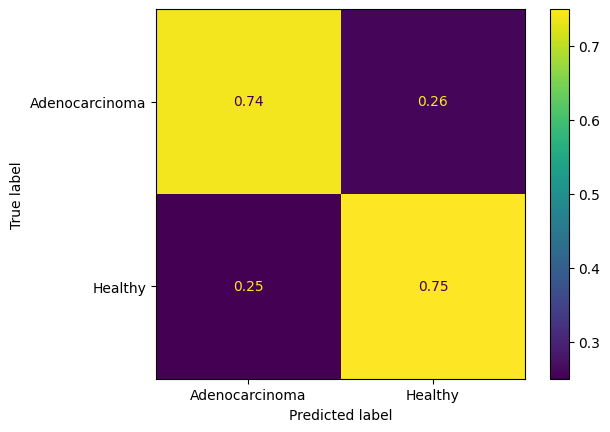

In [9]:
# Confusion matrix
cmat = confusion_matrix(y_test, y_pred, labels=model.classes_, normalize="true")
disp_cmat = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=model.classes_)
disp_cmat.plot()
plt.show()